# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semanas 6 y 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**



### **Nombres y Matrículas:**


*   Elemento de lista
*   Elemento de lista
*   Elemento de lista


### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al. de ELSEVIER, que deberás descargar para contestar varias de las preguntas de esta actividad (el acceso es sin costo alguno):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


## **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

## **Ejercicio 1**


### **De acuerdo al artículo de Moro et.al. de ELSEVIER, contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++




### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   Elemento de lista
*   Elemento de lista

etc ...


### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos pequeños ajustes.**

In [12]:
# Cargamos los datos del archivo:

data = pd.read_csv('/content/sample_data/dataset_Facebook.csv', sep=';', header='infer')
print('Total de registros y variables:',data.shape)
data.head(3).T

Total de registros y variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


## **Ejercicio 2**

### **Variables relacionadas con el tiempo**

### **Recordemos que las variables relacionadas con información del tiempo (meses, semanas, horas) pueden tratarse como variables categóricas o numéricas, dependiendo del contexto. En nuestro caso las variables mes, día de la semana y hora en que se puso el post, podríamos considerarlas como variables categóricas ordinales o bien como nominales. Sin embargo, para recordar cómo se transforman este tipo de variables en numéricas cíclicas, las transformarás a continuación.**

### **En la Tabla 3 del artículo de ELSEVIER nos comentan que la variable Post_hour está etiquetada de 0 a 23, por lo que las 24 horas serían las 0 horas, es decir tiene un comportamiento cíclico de 24 horas, que en términos matemáticos se dice que es una variable cíclica módulo 24. Así, las 24 horas será equivalente a las 0 horas. De manera análoga se procede con las variables del mes y el día de la semana.**

### **Se comenta en la Tabla 3 del artículo que las variables en relación al mes y día de la semana en que se publicó el post, que son los nombres de los meses y los días de la semana. Sin embargo, en realidad están capturadas como numéricas del 1 al 12 y del 1 al 7, respectivamente.**

### **La manera de transformar una variable T cíclica módulo M, es sustituyendo la columna original de la variable T por las siguientes dos columnas. Estas transformaciones están dentro de lo que se llama ingeniería de características (feature engineering):**

$Tsin = sin(2*\pi*T/M)$

$Tcos = cos(2*\pi*T/M)$

#### **NOTA: En las siguientes celdas donde se indica None, podrás agregar las líneas de código que consideres necesarias.**

In [13]:
# Ejercicio 2a:

# Define las dos nuevas variables cíclicas, "hora_sin" y "hora_cos" a partir
# de la variable "Post Hour" y de acuerdo a como se indicó previamente:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

hora_sin = np.sin(2*np.pi*data['Post Hour']/24)
hora_cos = np.cos(2*np.pi*data['Post Hour']/24)



# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++

In [14]:
# Ejercicio 2b:

# Agrega estas dos nuevas variables al DataFrame de tus datos
# y elimina la columna de la variable original "Post Hour":

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

data['hora_sin'] = hora_sin
data['hora_cos'] = hora_cos
data.drop(columns=['Post Hour'])



# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


,Page total likes,Type,Category,Post Month,Post Weekday,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,hora_sin,hora_cos
0,139441,Photo,2,12,4,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,0.707107,0.707107
1,139441,Status,2,12,3,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,0.500000,-0.866025
2,139441,Photo,3,12,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,0.707107,0.707107
3,139441,Photo,2,12,2,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,0.500000,-0.866025
4,139441,Photo,2,12,2,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,0.707107,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84,0.500000,0.866025
496,81370,Photo,2,1,5,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75,0.866025,-0.500000
497,81370,Photo,1,1,5,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115,0.500000,0.866025
498,81370,Photo,3,1,4,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136,0.258819,-0.965926


In [16]:
# Ejercicio 2c.

# Transforma de manera análoga la variable "Post Month"
# agregando mes_sin, mes_cos y eliminando la original.


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

mes_sin = np.sin(2*np.pi*data['Post Month']/12)
mes_cos = np.cos(2*np.pi*data['Post Month']/12)
data['mes_sin'] = mes_sin
data['mes_cos'] = mes_cos
data.drop(columns=['Post Month'])



# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++


,Page total likes,Type,Category,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,hora_sin,hora_cos,mes_sin,mes_cos
0,139441,Photo,2,4,3,0.0,2752,5091,178,109,...,1640,119,4,79.0,17.0,100,0.707107,0.707107,-2.449294e-16,1.000000
1,139441,Status,2,3,10,0.0,10460,19057,1457,1361,...,6112,1108,5,130.0,29.0,164,0.500000,-0.866025,-2.449294e-16,1.000000
2,139441,Photo,3,3,3,0.0,2413,4373,177,113,...,1503,132,0,66.0,14.0,80,0.707107,0.707107,-2.449294e-16,1.000000
3,139441,Photo,2,2,10,1.0,50128,87991,2211,790,...,32048,1386,58,1572.0,147.0,1777,0.500000,-0.866025,-2.449294e-16,1.000000
4,139441,Photo,2,2,3,0.0,7244,13594,671,410,...,3200,396,19,325.0,49.0,393,0.707107,0.707107,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,7,2,0.0,4684,7536,733,708,...,2876,392,5,53.0,26.0,84,0.500000,0.866025,5.000000e-01,0.866025
496,81370,Photo,2,5,8,0.0,3480,6229,537,508,...,2104,301,0,53.0,22.0,75,0.866025,-0.500000,5.000000e-01,0.866025
497,81370,Photo,1,5,2,0.0,3778,7216,625,572,...,2388,363,4,93.0,18.0,115,0.500000,0.866025,5.000000e-01,0.866025
498,81370,Photo,3,4,11,0.0,4156,7564,626,574,...,2452,370,7,91.0,38.0,136,0.258819,-0.965926,5.000000e-01,0.866025


In [17]:
# Ejercicio 2d.

# Transforma de manera análoga la variable "Post Weekday"
# agregando dia_sin, dia_cos y eliminando la original.


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

dia_sin = np.sin(2*np.pi*data['Post Weekday']/7)
dia_cos = np.cos(2*np.pi*data['Post Weekday']/7)
data['dia_sin'] = dia_sin
data['dia_cos'] = dia_cos
data.drop(columns=['Post Weekday'])



# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++


,Page total likes,Type,Category,Post Month,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,comment,like,share,Total Interactions,hora_sin,hora_cos,mes_sin,mes_cos,dia_sin,dia_cos
0,139441,Photo,2,12,3,0.0,2752,5091,178,109,...,4,79.0,17.0,100,0.707107,0.707107,-2.449294e-16,1.000000,-4.338837e-01,-0.900969
1,139441,Status,2,12,10,0.0,10460,19057,1457,1361,...,5,130.0,29.0,164,0.500000,-0.866025,-2.449294e-16,1.000000,4.338837e-01,-0.900969
2,139441,Photo,3,12,3,0.0,2413,4373,177,113,...,0,66.0,14.0,80,0.707107,0.707107,-2.449294e-16,1.000000,4.338837e-01,-0.900969
3,139441,Photo,2,12,10,1.0,50128,87991,2211,790,...,58,1572.0,147.0,1777,0.500000,-0.866025,-2.449294e-16,1.000000,9.749279e-01,-0.222521
4,139441,Photo,2,12,3,0.0,7244,13594,671,410,...,19,325.0,49.0,393,0.707107,0.707107,-2.449294e-16,1.000000,9.749279e-01,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,2,0.0,4684,7536,733,708,...,5,53.0,26.0,84,0.500000,0.866025,5.000000e-01,0.866025,-2.449294e-16,1.000000
496,81370,Photo,2,1,8,0.0,3480,6229,537,508,...,0,53.0,22.0,75,0.866025,-0.500000,5.000000e-01,0.866025,-9.749279e-01,-0.222521
497,81370,Photo,1,1,2,0.0,3778,7216,625,572,...,4,93.0,18.0,115,0.500000,0.866025,5.000000e-01,0.866025,-9.749279e-01,-0.222521
498,81370,Photo,3,1,11,0.0,4156,7564,626,574,...,7,91.0,38.0,136,0.258819,-0.965926,5.000000e-01,0.866025,-4.338837e-01,-0.900969


In [18]:
# Veamos lo que tenemos hasta el momento:
data.head(3).T

,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


In [19]:
# De las Tablas 2 y 3 del artículo de ELSEVIER seleccionamos las variables que
# trabajaremos en esta Actividad, con el ajuste que acabamos de hacer:

# Separamos los datos de entrada (ver Tabla 3 del artículo) y de la variable de salida (ver Tabla 2):
X = data[['Page total likes', 'Type', 'Category', 'Paid',
          'mes_sin', 'mes_cos', 'dia_sin', 'dia_cos', 'hora_sin', 'hora_cos']]
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con una de las
                                        # que se consideró más importante en el artículo de ELSEVIER.


# En esta actividad trataremos de comparar resultados con lo realizado en
# el artículo de Moro et.al., por lo que solo particionaremos en Train y Test.
# Particionamos en Train y Test en 80-20:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=5)

print('Train:', Xtrain.shape, ytrain.shape)
print('Test:', Xtest.shape, ytest.shape)


Train: (400, 10) (400, 1)
Test: (100, 10) (100, 1)


In [20]:
Xtrain.describe(include='all').T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                                   # En particular, las desviaciones estándar (std) desplegadas son las muestrales.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Page total likes,400.0,NaN,NaN,NaN,123493.3175,16094.977964,81370.0,113028.0,129600.0,136642.0,139441.0
Type,400,4,Photo,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,400.0,NaN,NaN,NaN,1.8925,0.85309,1.0,1.0,2.0,3.0,3.0
Paid,399.0,NaN,NaN,NaN,0.293233,0.455816,0.0,0.0,0.0,1.0,1.0
mes_sin,400.0,NaN,NaN,NaN,-0.064151,0.683412,-1.0,-0.5,-0.0,0.5,1.0
mes_cos,400.0,NaN,NaN,NaN,-0.020311,0.728639,-1.0,-0.866025,-0.0,0.866025,1.0
dia_sin,400.0,NaN,NaN,NaN,-0.030857,0.695903,-0.974928,-0.781831,-0.0,0.781831,0.974928
dia_cos,400.0,NaN,NaN,NaN,0.02559,0.718759,-0.900969,-0.900969,-0.222521,0.62349,1.0
hora_sin,400.0,NaN,NaN,NaN,0.435959,0.446634,-1.0,0.258819,0.5,0.707107,1.0
hora_cos,400.0,NaN,NaN,NaN,-0.194907,0.757894,-1.0,-0.866025,-0.5,0.707107,0.965926


### **Ajuste variable categórica en Pipeline**

#### **Veamos un ejemplo de cómo ajustar una variable categórica en la cual uno de sus niveles no tiene suficiente información y que se transforme evitando el filtrado de información. Para ello se deberán reagruparemos los niveles más pequeños hasta obtener un 5% de información.**

In [21]:
# Obtengamos las etiquetas únicas de data['Type'] ordenadas de mayor a menor frecuencia:
Xtrain['Type'].unique()

array(['Photo', 'Link', 'Status', 'Video'], dtype=object)

In [22]:
Xtrain['Type'].value_counts(normalize=True)  # Siguiendo la política de que cada nivel de una variable tenga
                                             # al menos el 5% de información, agruparemos los casos "Link"
                                             # y "Video" en un nuevo nivel que podría interpretarse como "Otros".

,proportion
Type,
Photo,0.8525
Status,0.0900
Link,0.0425
Video,0.0150


### **Para ello usaremos la siguiente Clase, que ayude a cuidar el filtrado de información durante el proceso de entrenamiento, en particular, al aplicar validación cruzada.**

In [23]:
# Transformador personalizado para agrupar categorías poco frecuentes
# en la variable "Type", a saber, "Link" y "Video".
# Puedes posteriormente ajustar la clase para que de manera automática
# se detecte que cada nivel tiene al menos un porcentaje de umbral determinado.

class TypeGrouper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.groups_to_replace = ['Link','Video']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if not isinstance(X_copy, pd.DataFrame):
            X_copy = pd.DataFrame(X_copy, columns=['Type'])

        X_copy.loc[X_copy['Type'].isin(self.groups_to_replace), 'Type'] = 'Otros'
        return X_copy


## **Ejercicio 3**

### **Utiliza un LLM (indica cuál o cuáles usastes) para explicar cada línea de código de la celda anterior.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   Elemento de lista
*   Elemento de lista

etc ...


### ++++++++ Termina la sección de agregar texto. +++++++++++

### **Transformación en la Variable de Salida**



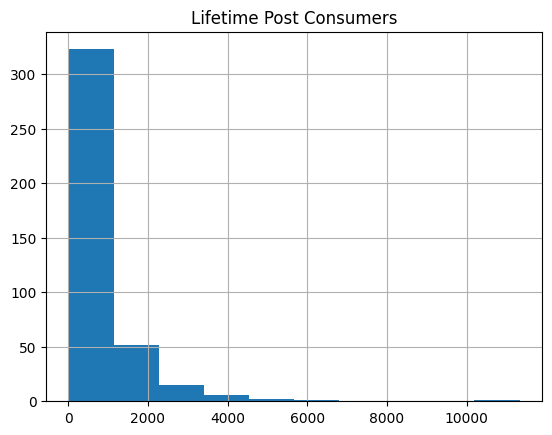

In [24]:
# Histograma que muestra un claro sesgo positivo en la variable objetivo:
ytrain.hist();

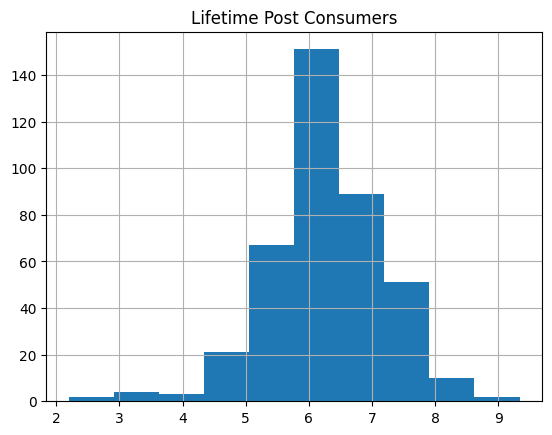

In [25]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [26]:
# Para una primera aproximación, podemos decir que se ajusta de manera aceptable
# la distribución con logaritmo a una acampanada.
# Procedemos entonces de la misma manera con Test:

ytestlog = np.log(ytest)

In [27]:
ytestlog.describe().T  # información de la variable objetivo transformada.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,100.0,6.355351,0.838278,2.70805,6.013103,6.387712,6.844544,8.084562


### **Pipeline de transformaciones**

In [28]:
# Aplicaremos lo mínimo de transformaciones.
# Las nuevas variables _sin y _cos ya quedaron escaladas entre -1 y +1, por
# lo que podemos dejarlas así y solamente cuidar sus posibles datos perdidos
# en datos futuros.

num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ('scaler', MinMaxScaler())
                             ])
num_pipe_nombres = ['Page total likes']


# Transformación del factor categórico de entrada "Type":
catMap_pipe = Pipeline(steps = [('typeMap', Pipeline([('grouper', TypeGrouper()),
                                                      ('encoder', OneHotEncoder(handle_unknown='ignore'))
                                                      ]))])
catMap_pipe_nombres = ['Type']


# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('NomImp', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = ['Category', 'Paid']


# Variables numéricas cíclicas:
mes_pipe = Pipeline(steps = [('MesImp', SimpleImputer(strategy='mean'))])
mes_pipe_nombres = ['mes_sin', 'mes_cos']

dia_pipe = Pipeline(steps = [('DiaImp', SimpleImputer(strategy='mean'))])
dia_pipe_nombres = ['dia_sin', 'dia_cos']

hora_pipe = Pipeline(steps = [('HoraImp', SimpleImputer(strategy='mean'))])
hora_pipe_nombres = ['hora_sin', 'hora_cos']


# Conjuntamos las transformaciones:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catmap', catMap_pipe, catMap_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres),
                                                        ('mes', mes_pipe, mes_pipe_nombres),
                                                        ('dia', dia_pipe, dia_pipe_nombres),
                                                        ('hora', hora_pipe, hora_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


In [29]:
# Solo para saber la nueva cantidad de columnas que tendremos
# después de las trasnformaciones:
XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (400, 10)
Variables de entrada transformadas: (400, 13)


### **Modelo Base (Baseline)**

In [30]:
# Variable objetivo con Log:
y_pred_baseline = np.full_like(ytestlog, fill_value=ytrainlog.mean())

# RMSE del baseline
rmse_baseline = mean_squared_error(ytestlog, y_pred_baseline)
print(f"MSE Baseline (promedio) con Logaritmo: {rmse_baseline:.2f}")

MSE Baseline (promedio) con Logaritmo: 0.70


## **Ejercicio 4**


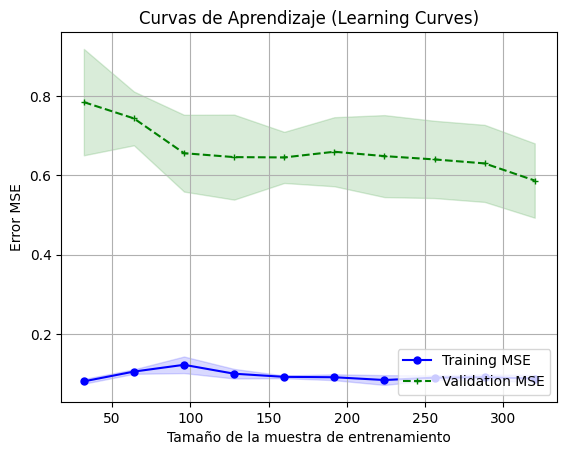

In [31]:
# Ejercicio 4a.

# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++


elmodelo_RF = RandomForestRegressor(random_state=1)





# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrain,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para MSE.
# El negativo es porque sklearn nos devuelve en realidad el negativo del error
# cuadrático medio MSE.

mse_train_scores = -train_scores
mse_val_scores = -val_scores

train_mean = np.mean(mse_train_scores, axis=1)
train_mse = np.std(mse_train_scores, axis=1, ddof=1)
val_mean = np.mean(mse_val_scores, axis=1)
val_mse = np.std(mse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean + train_mse, train_mean - train_mse, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation MSE')
plt.fill_between(train_sizes, val_mean + val_mse, val_mean - val_mse, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves)')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error MSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Ejercicio 4b.

# Una vez que verifiques que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el MSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest.

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


mejor_modelo_RF = RandomForestRegressor(random_state=1)





# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++


mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', mejor_modelo_RF)])
mipipe.fit(pd.DataFrame(Xtrain, columns=Xtrain.columns), np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error MSE(Test) de Random Forest: %.3f' % mean_squared_error(np.ravel(ytestlog), yhattest_RF))

## **Ejercicio 5**

In [ ]:
# Ejercicio 5:
# Calcula ahora el error porcencual absoluto medio (MAPE por sus siglas en inglés)
# del mejor modelo de Random Forest en el conjunto de Prueba (TEST).
# Llamarle "mape" a dicha variable.


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


None



# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++


# Imprimimos el resultado de MAPE en porcentaje:
print(f"MAPE: {mape:.2f}%")


## **Ejercicio 6**

### **Repite el mismo proceso del ejercicio con el modelo Bosque Aleatorio (Random Forest) para obtener los mejores modelos no subentrenados y no sobreentrenados, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [ ]:
# Incluye a continuación todas las celdas y líneas de código que consideres
# necesarias para responder el Ejercicio 6a, 6b y 6c.




None




## **Ejercicio 7**

### **Incluye tus conclusiones finales de la Actividad, en particular compara el resultado MAPE de tu mejor modelo del conjunto de Prueba (Test) con el resultado reportado en el artículo de Moro et.al en la sección de conclusiones.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


None


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Fin de la Actividad de la Semanas 6 y 7**